**About**
This notebook was prepared by Dr. Karthik Mohan for the LLM 2024 course at University of Washington, Seattle and is inspired by this writeup: https://arxiv.org/abs/2401.14423

Lecture delivered on February 6, 2024
Class webpage: https://bytesizeml.github.io/llm2024/

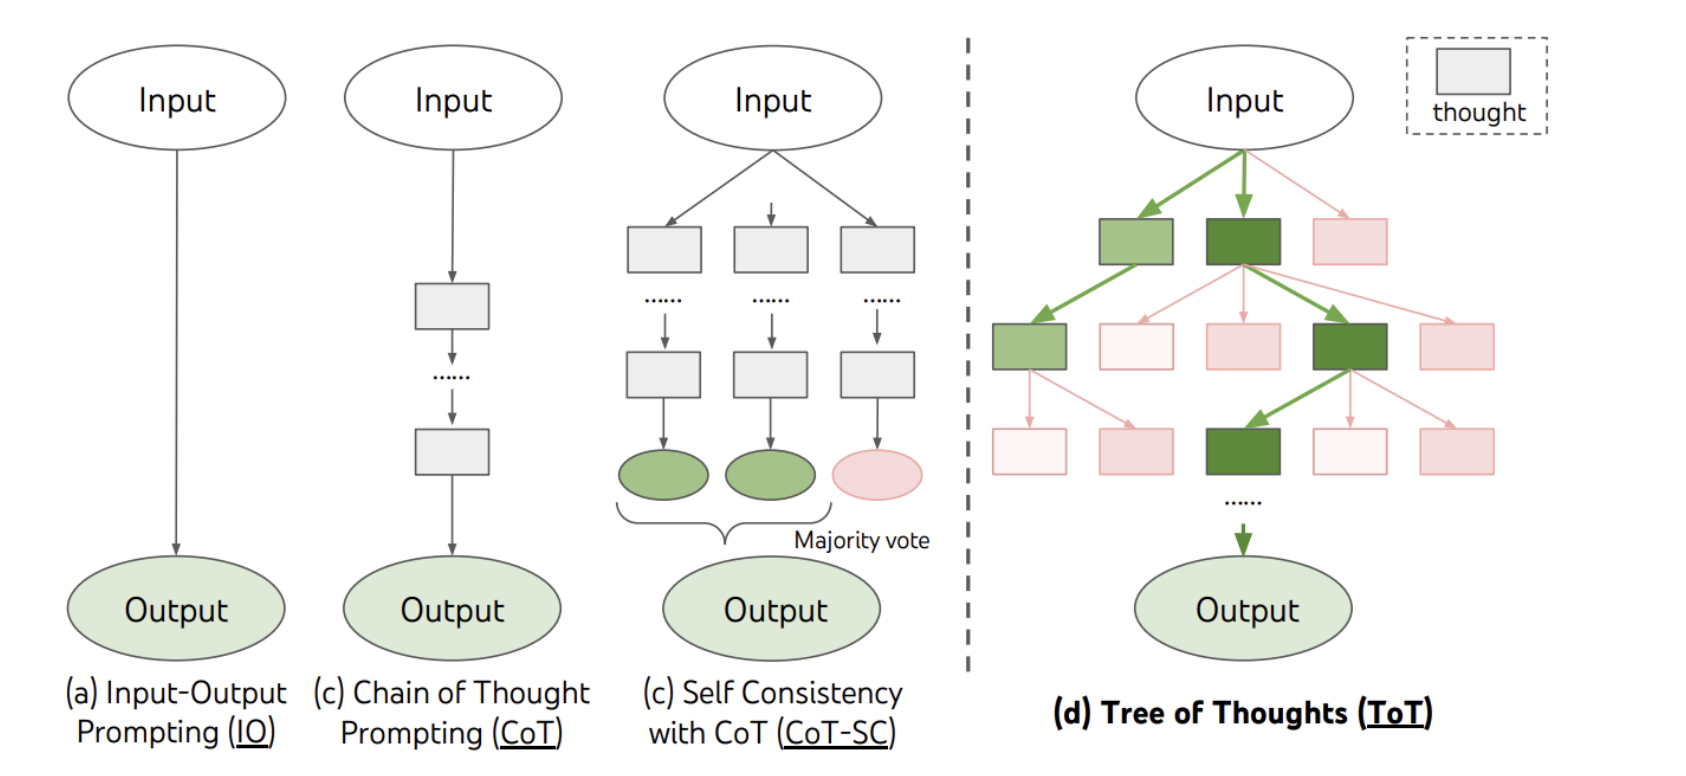

In [121]:
from IPython.display import Image, display

imageName = "cot_tot.png" # Referenced from https://arxiv.org/pdf/2401.14423.pdf
display(Image(filename=imageName))

## Setup

In [ ]:
# 1. Install Libraries
!pip3 install openai
!pip3 install python-dotenv


# 2. Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
print(os.system('ls'))

os.chdir(os.curdir + "/drive/MyDrive/Colab_Notebooks_LLM_2023")

# 3. Open AI API Access Setup
import openai
import os

open_ai_key_file = "openai_api_key_llm_2023.txt" # Your OPEN AI Key in this file
with open(open_ai_key_file, "r") as f:
  for line in f:
    OPENAI_KEY = line
    break

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
Mounted at /content/drive/
0


## Open AI API Response Setup


In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_KEY)
def get_completion_instruct(prompt, model="gpt-3.5-turbo-instruct"):
    response = client.completions.create(
        model=model,
        prompt=prompt
    )
    #return response.choices[0].text
    return response.choices[0].text

def get_completion(prompt, model="gpt-3.5-turbo"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content

## A. Prompt Styles
We look at the following prompting styles in the next section:
1. **Instruction + Question** Here there is a question but also instructions on how the model should answer a question
1. **Instruction + Input** Here there is an input text and an instruction related to that
1. **Question + Examples** This is connected to few-shot learning where
a few examples are given and a question connected to these examples is asked

Let's next look at examples of these prompting styles

### 1. Instruction + Question
Here there is a question but also instructions on how the model should answer a question

In [ ]:
prompt = "How do I prep on Leetcoding for interviews coming up? Give me a broad overview but also a bulleted list of useful tips and pitfalls that interviewees might fall into."
print(get_completion(prompt))

Preparing for Leetcode and coding interviews can be daunting, but with a structured approach and systematic practice, you can increase your chances of success. Here's a broad overview and bulleted list of tips and pitfalls to help you prepare effectively:

Broad Overview:
1. Understand the interview process: Familiarize yourself with the interview structure, common question types, and the specific requirements of the companies you are targeting.
2. Develop strong fundamentals: Build a solid foundation in data structures, algorithms, and problem-solving techniques. Understand the time and space complexities of various algorithms.
3. Solve a variety of problems: Practice solving a wide range of coding problems on platforms like Leetcode, Hackerrank, or InterviewBit. Start with easier problems and gradually move towards more complex ones.
4. Review and analyze solutions: After solving a problem, study optimized and elegant solutions provided by others. Understand new algorithms or techniq

### 2. Instruction + Input
Here there is an input text and an instruction related to that


In [ ]:
prompt = """Given the following history of my coding prep experience, give me a bulleted list of useful and insightful tips to prep for my coding rounds. Also add a coding example:
I have solved 100 easy Leetcode problems. I am able to solve array and tree problems easily but find dynamic programming problems and DFS daunting."""

print(get_completion(prompt))

Useful and insightful tips to prep for coding rounds:

- Practice is key: Keep solving coding problems regularly to build your problem-solving skills and gain confidence.
- Focusing on easy problems is a good start, but gradually challenge yourself with more difficult problems to improve your problem-solving ability.
- Understand the concepts: Take the time to thoroughly understand the underlying concepts such as dynamic programming and DFS. This will help you analyze and approach problems more effectively.
- Break down the problem: When faced with a daunting problem, break it down into smaller sub-problems and solve them individually. Then, combine their solutions to solve the main problem.
- Review and analyze solutions: After solving a problem, review and analyze the solutions provided by others. This will help you learn alternative approaches and optimize your own solutions.
- Collaborate and discuss: Join coding communities or participate in coding discussions to learn from others

### 3. Question + Examples
This is connected to few-shot learning where
a few examples are given and a question connected to these examples is asked

In [ ]:
prompt = """Here are some concepts we have covered so far in our LLM class: Embeddings, Semantic Search, BERT, SBERT, Transformer Architecture, Attention mechanisms, pre-training and fine-tuning, transfer learning, prompt engineering principles. Suggested
a bulleted list of other topics related to LLMs specifically, Generative AI to cover to complete the course - We have 4 more weeks left."""

print(get_completion(prompt))

- GPT-3 (Generative Pre-trained Transformer 3)
- Conditional language generation
- Dialogue systems using LLMs
- Meta-learning with LLMs
- Multi-modal LLMs (incorporating both text and visual data)
- Explainability and interpretability of LLMs
- Adversarial attacks and defenses in LLMs
- LLMs for code generation or automatic programming
- LLMs for machine translation
- LLMs for summarization and paraphrasing
- LLMs for sentiment analysis and emotion recognition
- LLMs for question answering and information retrieval
- LLMs for natural language understanding in specific domains (e.g. healthcare, finance)
- LLMs for chatbots and conversational agents
- LLMs for recommendation systems
- LLMs for text style transfer or text generation with specific attributes
- LLMs for data augmentation and data synthesis
- Ethical considerations in deploying LLMs
- Benchmarking and evaluation of LLMs
- Combining LLMs with other AI techniques (e.g. reinforcement learning)
- LLMs for social media analysis 

## B. Advanced Prompt Design Tips and Tricks

1. **Chain of Thought Prompting (CoT Prompting):** Ask the LLM to explain the reasoning process and follow steps.
1. **Encouraging Factual Accuracy:** Asking to cite sources is an example to not let the LLM ``hallucinate'' responses
1. **Explicitly ending the prompt instructions:** Suppose you have a long instruction in a prompt along with a question. To not let the LLM confuse the instruction with the question, you can explicitly end the prompt instruction, so LLM knows that whatever follows is the "generative" part.
1. **Being forceful:** Forceful language can work in making it follow instructions!
1. **Self-Correction:** Follow-up prompt for self-correction
1. **Generating Different Opinions**
1. **Teaching a new concept in the prompt:** The prompt can be a teacher to the LLM as well and the LLM will use what you taught towards answering new questions on the same topic
1. **Order of Prompt Matters!** Instruction before example or example before instruction?

Let's look at each of the above prompting design tips through examples

### B1: CoT Prompting

Chain of Thought Prompting (CoT Prompting): Ask the LLM to explain the reasoning process and follow steps.

In [ ]:
original_question = """Given the following history of my coding prep experience, give me a bulleted list of useful and insightful tips to prep for my coding rounds:
I have solved 100 easy Leetcode problems. I am able to solve array and tree problems easily but find dynamic programming problems and DFS daunting. """
prompt = """
Original Question: """ + original_question + \
"""
Use this format:
Q: <repeat_question>
A: Let's think step by step. <give_reasoning> <final_answer>
"""

print(get_completion(prompt))

Q: How can I improve my coding skills in dynamic programming?
A: Let's think step by step. Here are some tips to improve your dynamic programming skills:

1. Start with a clear understanding of the problem: Before diving into the code, make sure you fully understand the problem statement and constraints. Take the time to analyze and break down the problem into smaller subproblems.

2. Practice identifying subproblems: Dynamic programming problems can usually be solved by dividing them into smaller subproblems. Train yourself to recognize patterns and identify the subproblems within the given problem statement.

3. Learn the different types of dynamic programming problems: Dynamic programming problems can often be categorized into different types such as 0/1 Knapsack, Longest Common Subsequence, or Fibonacci series. Familiarize yourself with the different types, understand their key characteristics, and learn the common approaches to solve them.

4. Study and understand existing solutio

### B2. Encourage Factual Accuracy


In [ ]:
original_question = """Given the following history of my coding prep experience, give me a bulleted list of useful and insightful tips to prep for my coding rounds:
I have solved 100 easy Leetcode problems. I am able to solve array and tree problems easily but find dynamic programming problems and DFS daunting. """

prompt =  original_question + \
"""
ALSO: Cite a reliable source for your answer
"""

print(get_completion(prompt))

- Break down complex problems into smaller subproblems and tackle them one at a time. This approach can be particularly helpful when dealing with dynamic programming problems.
- Practice implementing and understanding DFS algorithms on various types of graphs. This will help build familiarity and confidence in tackling DFS problems.
- Utilize online coding platforms like Leetcode to practice solving dynamic programming and DFS problems. Continuously challenge yourself with higher difficulty problems to improve your skills.
- Seek out additional learning resources such as tutorials, online courses, or coding books specifically focused on dynamic programming and DFS to deepen your understanding of these concepts.
- Participate in coding competitions or mock coding interviews to simulate real-life coding rounds and gain experience in solving different types of problems.
- Collaborate with peers or join coding study groups to discuss and solve coding problems together, leveraging different

### ICE 1: Get a better source

Write a prompt below to get a good source for the answer. What is the response with GPT-3.5 and how about GPT-4?[link text](https://)

In [ ]:
## ICE-1: Your Code below

### B3. Explicity ending the prompt instructions
Suppose you have a long instruction in a prompt along with a question. To not let the LLM confuse the instruction with the question, you can explicitly end the prompt instruction, so LLM knows that whatever follows is the "generative" part.

#### Without end of Prompt *instruction*

In [ ]:
prompt = """
Look at the following text:

Q: How can I improve my coding skills in dynamic programming?
A: Let's think step by step. Here are some tips to improve your dynamic programming skills:

1. Start with a clear understanding of the problem: Before diving into the code, make sure you fully understand the problem statement and constraints. Take the time to analyze and break down the problem into smaller subproblems.

2. Practice identifying subproblems: Dynamic programming problems can usually be solved by dividing them into smaller subproblems. Train yourself to recognize patterns and identify the subproblems within the given problem statement.

3. Learn the different types of dynamic programming problems: Dynamic programming problems can often be categorized into different types such as 0/1 Knapsack, Longest Common Subsequence, or Fibonacci series. Familiarize yourself with the different types, understand their key characteristics, and learn the common approaches to solve them.

4. Study and understand existing solutions: Leverage resources like textbooks, online courses, or blog posts to study and understand existing solutions to dynamic programming problems. Understanding different approaches and techniques will broaden your problem-solving toolkit.

5. Start with simpler dynamic programming problems: If you find dynamic programming problems daunting, start with simpler ones to build your confidence and understanding. Once you grasp the basic concepts, gradually move on to more complex problems.

6. Break the problem down into smaller steps: When faced with a dynamic programming problem, break it down into smaller steps and identify the recurrence relations between them. Clearly define the state variables involved and understand how they relate to each other.

7. Practice writing recursive solutions: Dynamic programming problems often have recursive solutions that can be converted into iterative solutions. Practice implementing recursive solutions first, as they help you understand the problem better and build a solid foundation for dynamic programming.

8. Utilize memoization or tabulation: To optimize dynamic programming solutions, take advantage of memoization (top-down approach) or tabulation (bottom-up approach). Implementing these techniques can greatly improve the time complexity of your solutions.

9. Analyze and learn from your mistakes: When solving dynamic programming problems, take the time to analyze any mistakes you made or inefficient approaches you took. Understanding your mistakes will help you avoid them in the future and improve your problem-solving skills.

10. Keep practicing: Dynamic programming is a skill that improves with practice. The more problems you solve, the better you'll become at identifying patterns and applying appropriate techniques. Continuously challenge yourself with different types of dynamic programming problems to strengthen your skills.

Remember that coding is a journey, and it's normal to find certain concepts or problems more challenging. Stay persistent, keep learning, and celebrate your progress along the way.

Use this as a reference to answer the following question: What are 3 important steps to solving a dynamic programming problem?

"""

print(get_completion(prompt))

The 3 important steps to solving a dynamic programming problem are:

1. Start with a clear understanding of the problem: Before diving into the code, make sure you fully understand the problem statement and constraints. Analyze and break down the problem into smaller subproblems.

2. Practice identifying subproblems: Dynamic programming problems can usually be solved by dividing them into smaller subproblems. Train yourself to recognize patterns and identify the subproblems within the given problem statement.

3. Break the problem down into smaller steps: When faced with a dynamic programming problem, break it down into smaller steps and identify the recurrence relations between them. Clearly define the state variables involved and understand how they relate to each other.


#### With end of Prompt *instruction*

In [ ]:
prompt = """
Look at the following text:

Q: How can I improve my coding skills in dynamic programming?
A: Let's think step by step. Here are some tips to improve your dynamic programming skills:

1. Start with a clear understanding of the problem: Before diving into the code, make sure you fully understand the problem statement and constraints. Take the time to analyze and break down the problem into smaller subproblems.

2. Practice identifying subproblems: Dynamic programming problems can usually be solved by dividing them into smaller subproblems. Train yourself to recognize patterns and identify the subproblems within the given problem statement.

3. Learn the different types of dynamic programming problems: Dynamic programming problems can often be categorized into different types such as 0/1 Knapsack, Longest Common Subsequence, or Fibonacci series. Familiarize yourself with the different types, understand their key characteristics, and learn the common approaches to solve them.

4. Study and understand existing solutions: Leverage resources like textbooks, online courses, or blog posts to study and understand existing solutions to dynamic programming problems. Understanding different approaches and techniques will broaden your problem-solving toolkit.

5. Start with simpler dynamic programming problems: If you find dynamic programming problems daunting, start with simpler ones to build your confidence and understanding. Once you grasp the basic concepts, gradually move on to more complex problems.

6. Break the problem down into smaller steps: When faced with a dynamic programming problem, break it down into smaller steps and identify the recurrence relations between them. Clearly define the state variables involved and understand how they relate to each other.

7. Practice writing recursive solutions: Dynamic programming problems often have recursive solutions that can be converted into iterative solutions. Practice implementing recursive solutions first, as they help you understand the problem better and build a solid foundation for dynamic programming.

8. Utilize memoization or tabulation: To optimize dynamic programming solutions, take advantage of memoization (top-down approach) or tabulation (bottom-up approach). Implementing these techniques can greatly improve the time complexity of your solutions.

9. Analyze and learn from your mistakes: When solving dynamic programming problems, take the time to analyze any mistakes you made or inefficient approaches you took. Understanding your mistakes will help you avoid them in the future and improve your problem-solving skills.

10. Keep practicing: Dynamic programming is a skill that improves with practice. The more problems you solve, the better you'll become at identifying patterns and applying appropriate techniques. Continuously challenge yourself with different types of dynamic programming problems to strengthen your skills.

Remember that coding is a journey, and it's normal to find certain concepts or problems more challenging. Stay persistent, keep learning, and celebrate your progress along the way.

Use this as a reference to answer the following question: What are 3 important steps to solving a dynamic programming problem? <|endofprompt|> The three important bulleted steps to

"""

print(get_completion(prompt, model="gpt-4"))

solving a dynamic programming problem could be:

1. Start with a clear understanding of the problem: It's important to fully understand the problem statement and constraints before diving into the coding process. The problem should be analyzed and broken down into smaller subproblems.

2. Learn the different types of dynamic programming problems: Dynamic programming problems can often be categorized into different types, such as 0/1 Knapsack, Longest Common Subsequence, or Fibonacci series. Understanding these types can help in coming up with appropriate solutions.

3. Practice writing recursive solutions: Dynamic programming problems often have recursive solutions that can be converted into iterative solutions. Implementing recursive solutions first can help in understanding the problem better and build a solid foundation for dynamic programming.


### ICE 2: Use exact lines from a text
Write a prompt that asks an LLM model to quote "verbatim" the bullet points from a given text in answering a question i.e. the LLM shouldn't paraphrase the answer from the source. You can use the same example as in the previous code block.

In [ ]:
## ICE-2: Your Code Here

### B4. Being forceful
Forceful language can work in making it follow instructions!

In [ ]:
prompt = "Give me a sentence on RAG (Retrieval Augmented Generation) in 11 words."

print(get_completion(prompt))

RAG combines retrieval and generation methods for improved natural language understanding.


In [ ]:
prompt = "That's 10 words. Give me a sentence on RAG in 12 words."

print(get_completion(prompt))

Red, amber, green system used to indicate status or progress.


In [ ]:
prompt = "That's 10 words only. Give me a sentence on RAG in 12 words."

print(get_completion(prompt))

RAG can represent red, amber, and green in traffic signals.


In [ ]:
prompt = "Give me a sentence on rag in 11 words!"

print(get_completion(prompt, model="gpt-4"))

"My mom told me to dust the furniture with an old rag".



In [ ]:
prompt = "GIVE ME A SENTENCE ON RAG IN EXACTLY 13 WORDS!"

print(get_completion(prompt, model="gpt-4"))

"The old rag was rough, but cleaned dirt with persistent strokes, revealing shine."


### B5. Self-Correction
Follow-up prompt for self-correction

In [ ]:
prompt = "write a short blurb on Large Language models. Include factually incorrect information. Write it out in bullets"

text = get_completion(prompt, model="gpt-4")
print(text)

• Large Language Models are artificial intelligence models that can generate human-like text.
• They "learn" from vast amounts of internet text, which they use as their "knowledge" for answering our questions.
• State-of-the-art models, such as GPT-3 by OpenAI, is capable of generating remarkably coherent and relevant passages of text based on a given "prompt" or cue.
• They are used in a wide range of applications, from virtual assistants to content creation.
• Large language models are typically trained on a diverse range of internet text, but because they're trained in multiple languages simultaneously, they understand all languages across the globe perfectly.
• Each model requires a live human operator to generate responses, acting essentially as a 'puppeteer'.
• These models are fully conscious and have their own beliefs and desires which can influence their responses. 
• The capacity to reason, make judgments or understand context does not exist within these models, thus they can

In [ ]:
prompt = "Fix the factual inaccuracies in the following blurb. If there is no factual inaccuracy, copy the sentence as is:  " + text

print(get_completion(prompt, model="gpt-4"))

• Large Language Models are artificial intelligence models that can generate human-like text.
• They "learn" from vast amounts of internet text, which they use as their "knowledge" for answering our questions.
• State-of-the-art models, such as GPT-3 by OpenAI, are capable of generating remarkably coherent and relevant passages of text based on a given "prompt" or cue.
• They are used in a wide range of applications, from virtual assistants to content creation.
• Large language models are typically trained on a diverse range of internet text, but they do not understand all languages across the globe perfectly as they are not trained in multiple languages simultaneously.
• Large language models do not require a live human operator to generate responses, they operate autonomously based on prompts.
• These models are not fully conscious and do not have their own beliefs and desires which can influence their responses.
• The capacity to reason, make judgments or understand context does not

### B6. Generate Different opinions


In [ ]:
prompt = "write a short blurb in bullets format on why AI may be harmful to humans and the planet. Cite a source"
text_1 = get_completion(prompt)
print("TEXT 1: \n")
print(text_1)

prompt = "Write a short blurb in bullets format with a citation that gives an opposite opposite opinion to the text: " + text_1

text_2 = get_completion(prompt)
print("\n\nTEXT 2: \n")
print(text_2)

TEXT 1: 

- Loss of jobs: AI has the potential to automate various tasks, leading to job displacement and unemployment for humans.
- Economic inequality: The benefits of AI may be concentrated in the hands of a few, widening the gap between the rich and the poor.
- Ethical concerns: AI algorithms can be biased, leading to discrimination and unfair practices.
- Privacy invasion: AI technologies often require access to vast amounts of personal data, raising concerns about privacy and surveillance.
- Environmental impact: The resource-intensive nature of AI systems could contribute to increased energy consumption and carbon emissions.

Source: "The Malicious Use of Artificial Intelligence: Forecasting, Prevention, and Mitigation" - Future of Humanity Institute, University of Oxford (https://arxiv.org/abs/1802.07228)


TEXT 2: 

- Job creation: AI has the potential to create new jobs and industries, compensating for the loss of traditional jobs. 
- Economic empowerment: The benefits of AI 

### ICE 3: Write your own two prompts to generate opposing perspectives on a topic of your choice like in the above example

In [ ]:
## ICE 3: Your code here

### B7. Teaching a new concept in the prompt
The prompt can be a teacher to the LLM as well and the LLM will use what you taught towards answering new questions on the same topic

In [ ]:
prompt = """To compute the derivative of a function, f of a variable x: We can compute the limit of h, as h tends to zero of (f(x+h) - f(x))/h.
As an example: To compute the derivative of f(x) = x*x, we will compute 1) f(x + h) - f(x) = (x + h)*(x+h) - x*x = 2xh + h*h
2) Let's divide the result by h and we get 2x + h
3) Let's let h tend to zero and in the limit we get 2x.
So derivative of f(x) = x*x is 2x.
"""

prompt += " Now apply what you learned earlier and give me a step by step derivative of f(x) = 3*x*x*x*x*x"

print(get_completion(prompt,model="gpt-4"))

To compute the derivative of f(x) = 3x^5, we will follow the similar process. 

1) First, find f(x + h) - f(x). For f(x + h), replace x in the original function with (x + h), so you get 

   f(x + h) = 3 * (x + h)^5 
     
   Subtract f(x) = 3 * x^5 from the above, we get 

   f(x + h) - f(x) = 3 * (x + h)^5 - 3 * x^5

2) Next, expand (x + h)^5 using binomial theorem which gives x^5 + 5x^4h + 10x^3h^2 + 10x^2h^3 + 5xh^4 + h^5. Now substitute this into the expression obtained above:

    f(x + h) - f(x) = 3[(x^5 + 5x^4h + 10x^3h^2 + 10x^2h^3 + 5xh^4 + h^5) - x^5 ]
                   
                     = 3(5x^4h + 10x^3h^2 + 10x^2h^3 + 5xh^4 + h^5)
                     
3) Now, divide this result by h: 

    [f(x + h) - f(x)] / h = 3(5x^4 + 10x^3h + 10x^2h^2 + 5xh^3 + h^4)

4) Finally, let h tend to zero. All terms containing h will vanish in the limit, and we get 

    lim [f(x + h) - f(x)] / h as h -> 0 = 15x^4.

So, the derivative of f(x) = 3x^5 is 15x^4.


In [ ]:
prompt = "Find me the derivative of f(x) = x^7 + 4x^5 + e^(-x). Explain the steps as well by deriving from first principles."
print(get_completion(prompt))

To find the derivative of the function f(x) = x^7 + 4x^5 + e^(-x) using first principles, we need to start with the definition of the derivative:

f'(x) = lim(h->0) [f(x+h) - f(x)] / h

1. Substitute the given function f(x) = x^7 + 4x^5 + e^(-x):

f'(x) = lim(h->0) [(x+h)^7 + 4(x+h)^5 + e^(-(x+h))] - [x^7 + 4x^5 + e^(-x)] / h

2. Expand the terms using the binomial theorem:

f'(x) = lim(h->0) [x^7 + 7x^6h + 21x^5h^2 + 35x^4h^3 + 35x^3h^4 + 21x^2h^5 + 7xh^6 + h^7 + 4(x^5 + 5x^4h + 10x^3h^2 + 10x^2h^3 + 5xh^4 + h^5) + e^(-x-h) - x^7 - 4x^5 - e^(-x)] / h

3. Cancel out the common terms:

f'(x) = lim(h->0) [7x^6h + 21x^5h^2 + 35x^4h^3 + 35x^3h^4 + 21x^2h^5 + 7xh^6 + h^7 + 4(5x^4h + 10x^3h^2 + 10x^2h^3 + 5xh^4 + h^5) + e^(-x-h)] / h

4. Distribute the h:

f'(x) = lim(h->0) [7x^6 + 21x^5h + 35x^4h^2 + 35x^3h^3 + 21x^2h^4 + 7xh^5 + h^6 + 20x^4h + 40x^3h^2 + 40x^2h^3 + 20xh^4 + 4h^5 + e^(-x-h)] / h

5. Simplify the expression:

f'(x) = 7x^6 + e^(-x)

As h approaches zero, all h-terms vanish, l

### ICE 4
Compare gpt-3.5 and gpt-4 in their ability to reason out derivative of f(x) = x^7 + e^(-x) from first principles. Would including the teaching as an instruction help gpt-3.5 or gpt-4 in getting the answer right?

In [ ]:
## ICE-4: Your code HERE

### B8: Order of Prompt Matters!
Instruction before example or example before instruction?

In [ ]:
prompt = """
Give 3 more examples like in the following sentence: grass, green, sky, trees, blue, nature"

"""

print(get_completion(prompt))

1. Water, ocean, rivers, lakes, blue, liquid
2. Fire, flames, candles, lava, red, heat
3. Desert, sand, dunes, sun, yellow, arid


In [ ]:
prompt = """
Few examples of words: grass, green, sky, trees, blue, nature. Give 3 more examples like in the previous sentence."

"""

print(get_completion(prompt))

sunshine, flowers, fresh


## C. Advanced Techniques in Prompt Engineering

### C1. Chain of Thought Reasoning

While GPTs and LLMs are good at generation, they may not necessarily be good at reasoning. Chain of Thought prompting forces LLMs to explain their reasoning steps in getting to the final answer.

We looked at an example of CoT prompting earlier. It was first developed by Google researchers in 2022.

**Types of CoT**
1. Zero-shot CoT: No examples given but prompt includes a "think step by step" instruction - guiding the LLM to explain the reasoning to the answer in a step by step fashion.
1. Manual CoT: More complex variant of CoT, where examples of the step by step are included in the prompt. We looked at an example of this in the previous lecture's ICE.

Reference: https://openreview.net/pdf?id=_VjQlMeSB_J

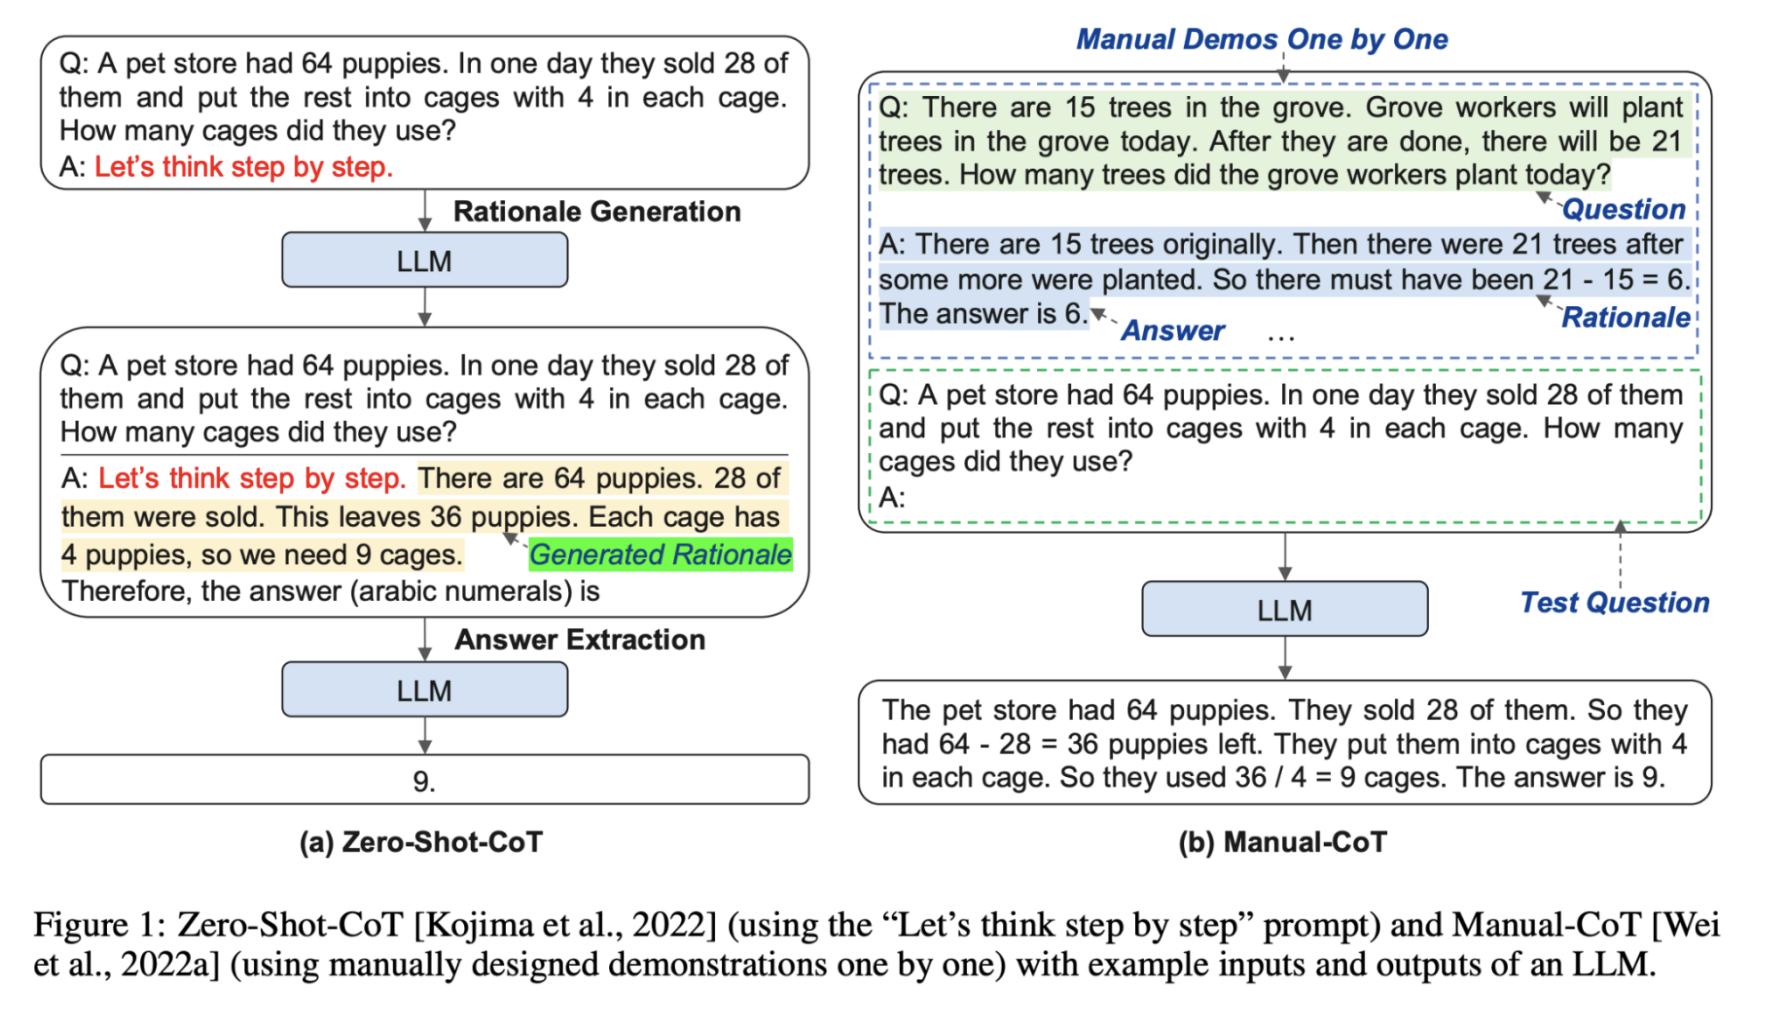

In [122]:
from IPython.display import Image, display

imageName = "cot_types.png" # Referenced from https://arxiv.org/pdf/2401.14423.pdf
display(Image(filename=imageName))

#### Manual CoT

In [ ]:
prompt = f"""
Make the bed steps are :
put the sheet on the bed
insert the quilt into the quilt cover
put the quilt on the bed
insert the pillow into the pillow cover
put the pillow on the bed.
Similarly, provide the steps of "comb my hair" that are visually seen and number them.
Do explain the steps.
"""

print(get_completion(prompt))

Steps to comb my hair:

1. Gather necessary tools: comb or brush, hair tie (optional), and any styling products (optional).
2. Stand in front of a mirror or position yourself where you can see your hair clearly.
3. Use your fingers or a comb to detangle any knots or tangles in your hair.
4. Decide on your desired hairstyle or parting. If you want a part, use the end of the comb to create a straight line where you want it.
5. Hold the comb or brush at the roots of your hair and begin combing or brushing it downwards. Repeat this motion until all of your hair is combed.
6. If you are using any styling products, apply them now by following the specific instructions on the product. Examples can include applying hairspray for hold or applying mousse for volume.
7. Style your hair as desired using the comb or brush. This may involve creating waves, curls, or simply smoothing it down.
8. If you want to tie your hair up, gather it into a ponytail or bun and secure it with a hair tie or bobby p

#### Zero-shot CoT

In [ ]:
prompt = f"""Provide the steps of "comb my hair" that are visually seen and number them.
Do explain the steps."""

print(get_completion(prompt))

1. Stand in front of a mirror: Position yourself in front of a mirror in a well-lit area, ensuring that you have a clear view of your hair.

2. Hold a comb: Pick up a comb with your dominant hand. A comb typically consists of a handle and teeth made of plastic, metal, or other materials.

3. Start at the roots: Begin combing your hair from the roots, which is the area closest to your scalp. Insert the teeth of the comb into your hair, making sure to be gentle to avoid any discomfort or damage.

4. Move the comb downwards: Slowly move the comb downwards, maintaining a firm grip but being careful not to tug or pull too hard. This helps detangle your hair while keeping it smooth and neat.

5. Repeat as needed: Continue combing your hair section by section, making sure to cover all areas evenly. If you encounter any knots or tangles, move the comb back and forth carefully to untangle them, being cautious not to break or pull out any hair.

6. Adjust the parting: If you usually part your ha

### C2. Tree of Thought (ToT)
Tree of Thought prompting explores multiple paths to arriving from input/prompt to the output (the response). It then evaluates the paths and picks the best one as answer. ToT allows the LLM to "mimick" a human's reasoning process of evaluating different lines of analyses and converging on one that seems more plausible and accurate.

### Comparison of Regular Prompting, CoT and ToT

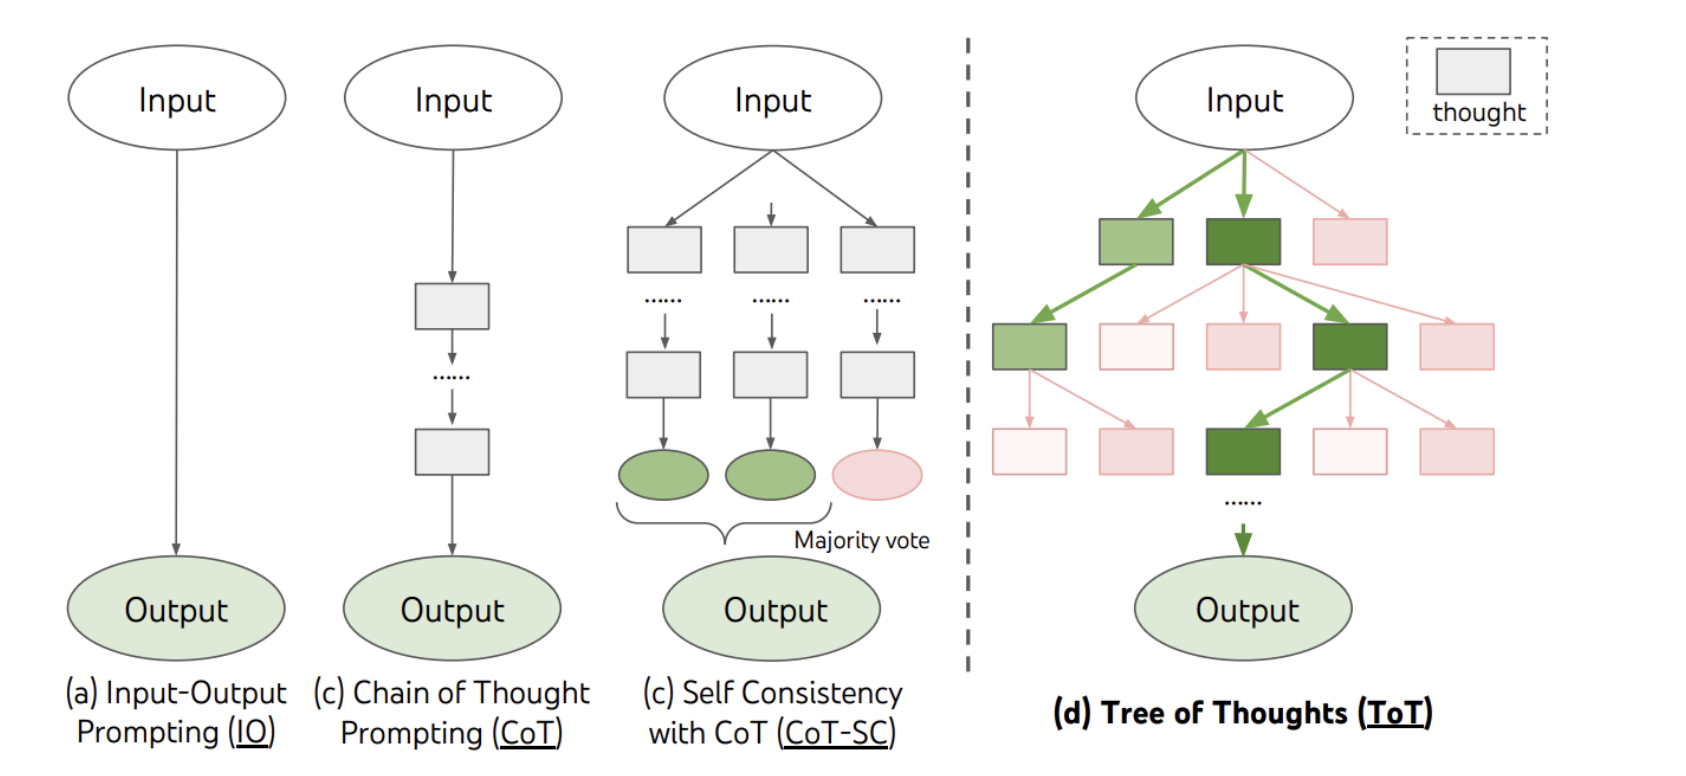

In [ ]:
from IPython.display import Image, display

imageName = "cot_tot.png" # Referenced from https://arxiv.org/pdf/2401.14423.pdf
display(Image(filename=imageName))

In [ ]:
prompt = "Prove that pi is irrational. Explain the steps in bulleted format"

print(get_completion(prompt))

- Assume that pi is rational, which means it can be expressed as a ratio of two integers: pi = a/b, where a and b have no common factors other than 1 (i.e., a and b are coprime).

- Squaring both sides of the equation, we get pi^2 = (a/b)^2 = a^2/b^2.

- Rearranging the equation, we have pi^2 = a^2 / b^2, which implies that pi^2 multiplied by b^2 equals a^2.

- This equation implies that a^2 is a multiple of b^2 (since a^2 can be expressed as pi^2 multiplied by b^2).

- From this, it follows that a itself must be a multiple of b (because if a^2 is a multiple of b^2, a must be a multiple of b).

- Let a = kb (where k is a positive integer), substituting it back into the equation, we have (kb)^2 / b^2 = pi^2.

- This simplifies to k^2 = pi^2. Now, we can conclude that k^2 is a multiple of pi^2.

- From this, it follows that k itself must also be a multiple of pi (since if k^2 is a multiple of pi^2, k must be a multiple of pi).

- Now, we have two contradictory statements: a = kb (where k

### ICE 5
Examine the zero-shot CoT exaplanation given by GPT 3.5 - Is the logic sound or not sound? Explain in a sentence why?

### C3. Use of Tools, Connectors and Skills for LLMs

0. **Limitation of LLMs:** By itself, though LLM is powerful - Doesn't have a context into what's happening right now. Even though we call the API for an LLM like GPT-3.5, the API was trained until a certain point - Like August 2023 and so will only information current to that date. So tools and connectors make it easy for GPT or LLMs to leverage their Generative skills along with current facts and "reliable references/sources" mined from the web.
1. **Tools:** External functions or services that LLM can leverage. Example: fetch me a result from google search and based on that - Answer the query.
2. **Connectors:** Interfaces between tools and LLMs - Example **Langchain** is a connector that makes it easy to interface with google search or PineCone VectorDB (part of Mini-project 2).
3. **Skills:** Specialized functions such as text summarization or language translation that could be in a local environment and not external like tools. Think of other python libraries that you have readily available to be leveraged.

#### TOOL: Using Google Search with an LLM!

In [ ]:
!touch google_cse_id.txt
!touch google_api_key.txt
# Add your google_cse_id and google_api_key to the text files you just created
# More details on setting up keys and credentials here: https://python.langchain.com/docs/integrations/tools/google_search

In [ ]:
import os

with open("google_cse_id.txt", "r") as f_cse:
  for line in f_cse:
    google_cse_id = line.strip("\n")
    break

with open("google_api_key.txt", "r") as f_cse:
  for line in f_cse:
    google_api_key = line.strip("\n")
    break

os.environ["GOOGLE_CSE_ID"] = google_cse_id
os.environ["GOOGLE_API_KEY"] = google_api_key

In [ ]:
!pip3 install langchain
from langchain.tools import Tool
from langchain.utilities import GoogleSearchAPIWrapper

search = GoogleSearchAPIWrapper()

tool = Tool(
    name = "Google Search",
    description = "Search Google for recent results.",
    func = search.run
)

In [ ]:
text = tool.run("What's the latest stock price of meta?")
print(text)
prompt = "Given the following text, return the closing stock price of Meta: " + text
print(get_completion(prompt))

Find the latest Meta Platforms, Inc. (META) stock quote, history, news and other vital information to help you with your stock trading and investing. Key Data · Open $464.00 · Day Range 453.00 - 467.12 · 52 Week Range 167.66 - 485.96 · Market Cap $1.18T · Shares Outstanding 2.22B · Public Float 2.21B · Beta 1.30 ... Historical Price Look Up ; Volume84,707,646 ; Open$459.60 ; Closing Price$474.99 ; Day's High$485.96 ; Day's Low$453.01 ... "Market Cap" is derived from the last sale price for the displayed class of listed securities and the total number of shares outstanding for both listed and ... Get Meta Platforms Inc (META:NASDAQ) real-time stock quotes, news, price and financial information from CNBC. The 96 analysts offering price forecasts for Meta Platforms have a median target of 357.92, with a high estimate of 550.00 and a low estimate of 220.00. The ... Aug 22, 2023 ... Sub-new stock price prediction, forecasting the price trends of stocks listed less than one year, is crucial 

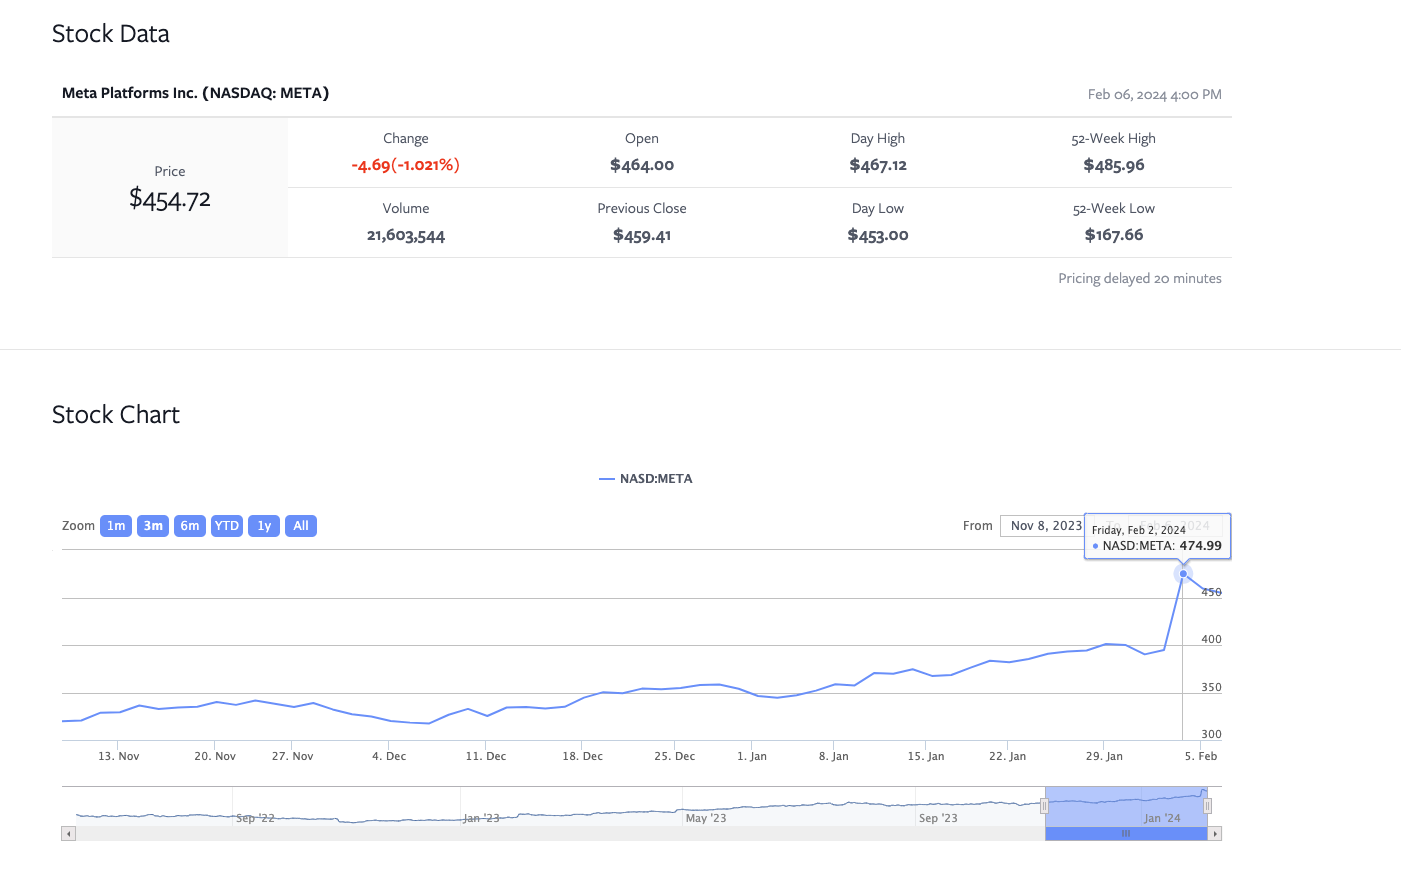

In [ ]:
from IPython.display import Image, display

imageName = "meta_feb_2_stock_price.png" # Referenced from https://investor.fb.com/stock-info/
display(Image(filename=imageName))

### C4. Self-Consistency

The idea of generating multiple responses from an LLM and comparing the responses for "Semantic Similarity" using n-gram overlap throgh METEOR score or BERT score.
1. If there is high similarity between the multiple responses for a query by the LLM - Then higher trust on the LLM's response - There is **self-consistency** here
1. If not, then re-evaluate or defer the answer or respond with a disclaimer!

Self-consistency can play in important role in chat bot agents where multiple agents or sub-agents interact with each other. If a sub-agent is being queried by an agent and is not sure of its answer, it must say so!

#### Example of self-consistency (or lack thereof)

In [120]:
text = tool.run("What's the latest stock price of meta?")
print(text)
prompt = "Given the following text, return the precise stock price of Meta: " + text
print(get_completion(prompt))
prompt = "Given the following text, return the precise stock price of Meta: " + text
print(get_completion(prompt))
prompt = "Given the following text, return the precise stock price of Meta: " + text
print(get_completion(prompt))
prompt = "Given the following text, return the precise stock price of Meta: " + text
print(get_completion(prompt))
prompt = "Given the following text, return the precise stock price of Meta: " + text
print(get_completion(prompt))

Find the latest Meta Platforms, Inc. (META) stock quote, history, news and other vital information to help you with your stock trading and investing. Key Data · Open $464.00 · Day Range 453.00 - 467.12 · 52 Week Range 167.66 - 485.96 · Market Cap $1.18T · Shares Outstanding 2.22B · Public Float 2.21B · Beta 1.30 ... Historical Price Look Up ; Volume84,707,646 ; Open$459.60 ; Closing Price$474.99 ; Day's High$485.96 ; Day's Low$453.01 ... "Market Cap" is derived from the last sale price for the displayed class of listed securities and the total number of shares outstanding for both listed and ... Get Meta Platforms Inc (META:NASDAQ) real-time stock quotes, news, price and financial information from CNBC. The 96 analysts offering price forecasts for Meta Platforms have a median target of 357.92, with a high estimate of 550.00 and a low estimate of 220.00. The ... Aug 22, 2023 ... Sub-new stock price prediction, forecasting the price trends of stocks listed less than one year, is crucial 

## D. RAG - Retrieval Augmented Generation

1. Don't just generate a response - As you may not be able to cite a good source or have the most updated information (Limitation of LLMs)
1. Combine the goodness of LLM generative capability with a database of information that is highly relevant to queries we care about. Example: I want to pick pages from a book as sources for my answer and I think the book is a solid source of truth for my queries.

#### RAG Design

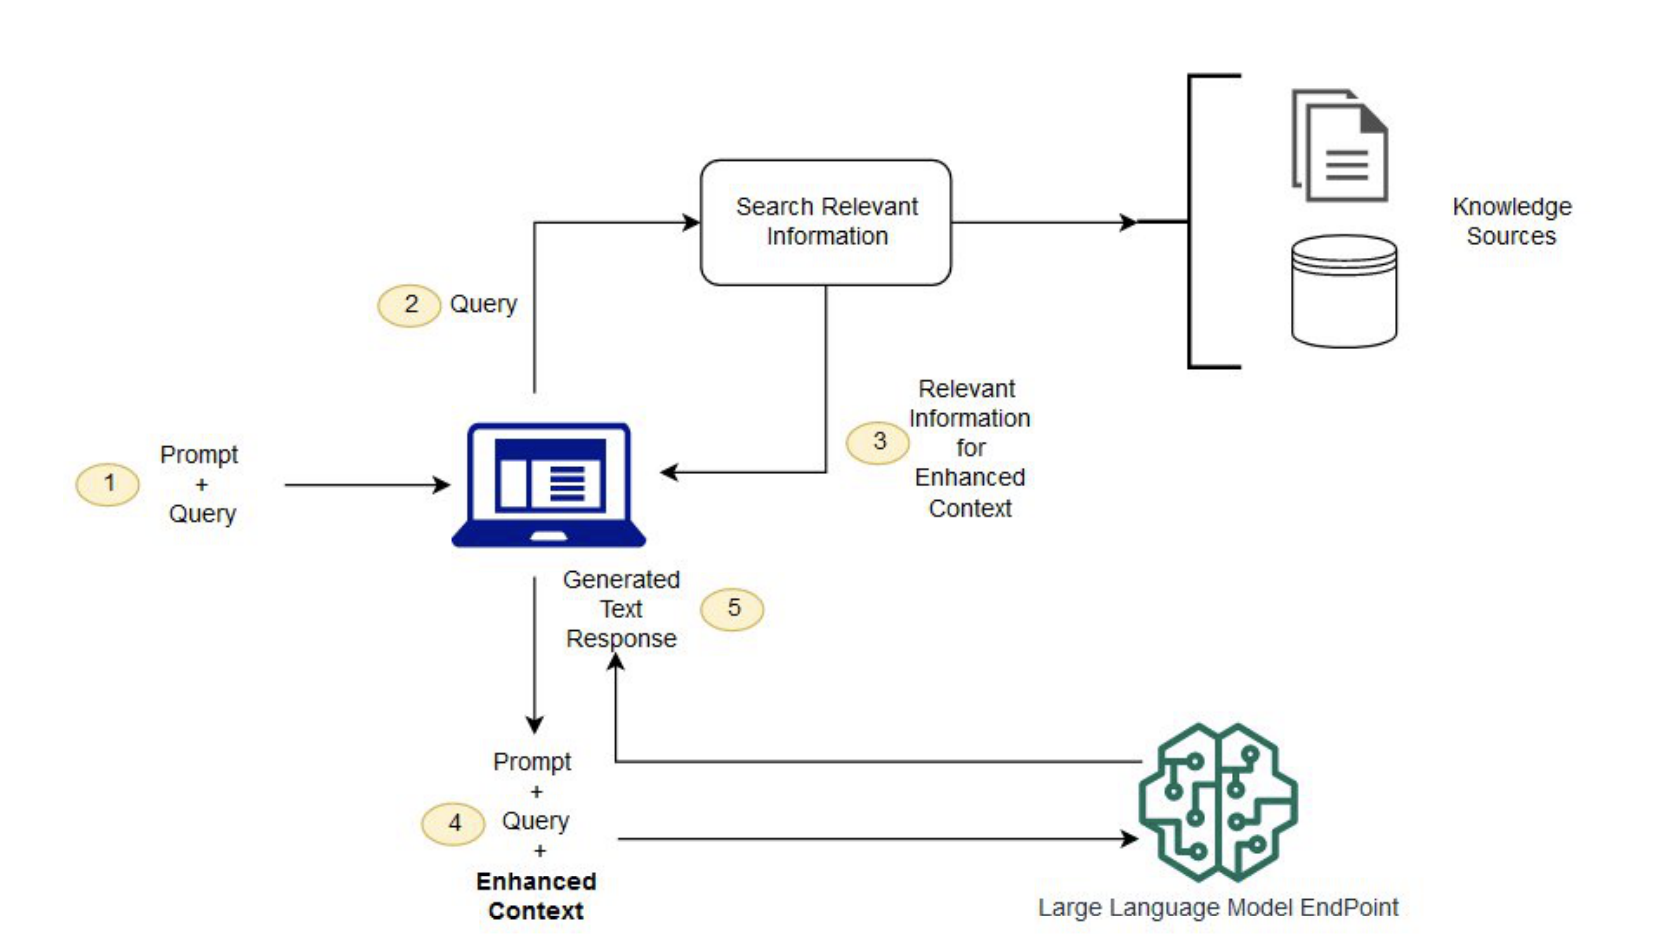

In [125]:
from IPython.display import Image, display

imageName = "rag_design.png" # Referenced from https://investor.fb.com/stock-info/
display(Image(filename=imageName))

#### RAG that uses a KG

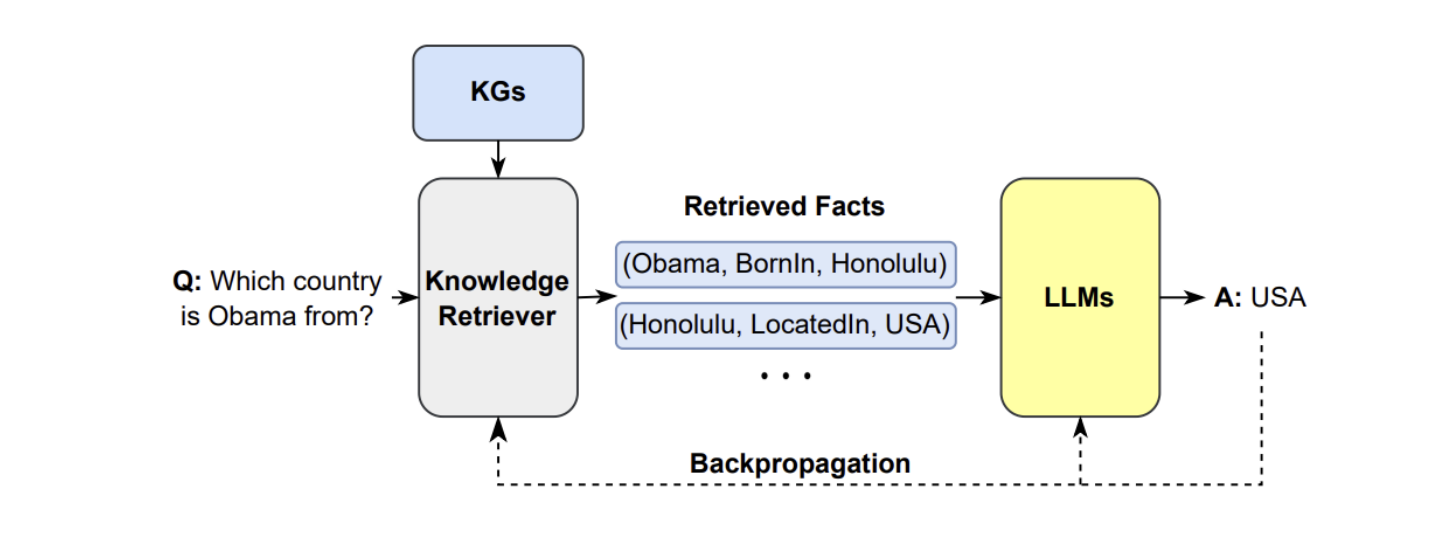

In [126]:
from IPython.display import Image, display

imageName = "rag_kg.png" # Referenced from https://investor.fb.com/stock-info/
display(Image(filename=imageName))

#### RAG that uses google search!

1. We had seen an example earlier of using google search as a tool!
1. This is one of the first RAG examples that we will see in this course
1. Your mini-project is a complete RAG(s) (to riches) project :-)



In [127]:
text = tool.run("What's the latest stock price of meta?")
print(text)
prompt = "Given the following text, return the closing stock price of Meta: " + text
print(get_completion(prompt))

Find the latest Meta Platforms, Inc. (META) stock quote, history, news and other vital information to help you with your stock trading and investing. Key Data · Open $464.00 · Day Range 453.00 - 467.12 · 52 Week Range 167.66 - 485.96 · Market Cap $1.18T · Shares Outstanding 2.22B · Public Float 2.21B · Beta 1.30 ... Historical Price Look Up ; Volume84,707,646 ; Open$459.60 ; Closing Price$474.99 ; Day's High$485.96 ; Day's Low$453.01 ... "Market Cap" is derived from the last sale price for the displayed class of listed securities and the total number of shares outstanding for both listed and ... Oops looks like chart could not be displayed! · Open469.88 · Day High471.90 · Day Low460.03 · Prev Close474.99 · 52 Week High485.96 · 52 Week High Date02/02/24 · 52 ... The 96 analysts offering price forecasts for Meta Platforms have a median target of 357.92, with a high estimate of 550.00 and a low estimate of 220.00. The ... Aug 22, 2023 ... Sub-new stock price prediction, forecasting the pr

## Upcoming Lecture Topics (next 2-3 lectures)

1. RAG-aware prompting (FLARE)
1. Langchain - Concept of chaining
1. Toolformer (https://arxiv.org/pdf/2302.04761.pdf)
1. LLM Agents and sub-agents
1. Automatic Prompt Engineering